<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2-d-Plot" data-toc-modified-id="2-d-Plot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2-d Plot</a></span></li><li><span><a href="#3-d-plot" data-toc-modified-id="3-d-plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>3-d plot</a></span></li><li><span><a href="#Multi-plot" data-toc-modified-id="Multi-plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multi plot</a></span><ul class="toc-item"><li><span><a href="#With-3-d-plots" data-toc-modified-id="With-3-d-plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>With 3-d plots</a></span></li><li><span><a href="#With-2-d-plots" data-toc-modified-id="With-2-d-plots-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>With 2-d plots</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cartesian_explorer import Explorer
import time

%load_ext autoreload
%autoreload 2

In [2]:
ex = Explorer(parallel='thread')

## 2-d Plot

In [3]:
@ex.add_function(provides=('flavour', 'colour'), requires=('label', 'delimeter'))
def unpack_label(label, delimeter):
    flavour, colour = label.split(delimeter)
    return flavour, colour

@ex.add_function(provides='cost', requires=('flavour', 'colour', 'date'))
def get_cost_history(flavour, colour, date):
    base_fare = 1
    volatility = 1
    trend = 0
    if flavour=='almond':
        base_fare *= 2
        trend += 1
    else:
        volatility += 2
        
    if colour=='red':
        trend -= 1
        base_fare += 3
        volatility += 1.4
        
    time.sleep(.1)
    return np.random.laplace(loc=base_fare, scale=volatility) + trend*date


[<AxesSubplot:title={'center':'Spices prices'}, xlabel='date', ylabel='cost'>]

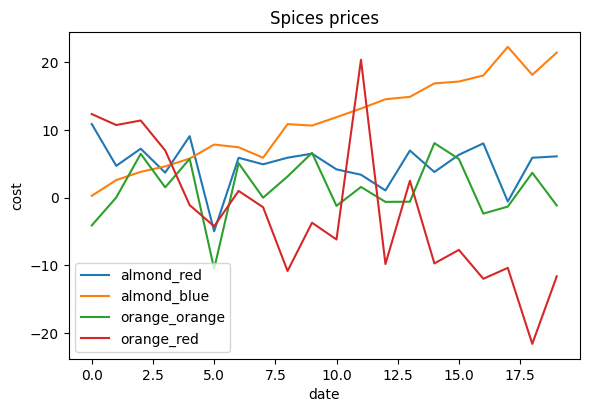

In [4]:
fig = ex.plot_variables2d('cost',
                    processes=2,
                    label=['almond_red', 'almond_blue', 'orange_orange', 'orange_red'],
                    date=np.arange(20),
                    delimeter='_')
_ = plt.title('Spices prices')
fig.axes

## 3-d plot

In [5]:
ex2 = Explorer()

@ex2.add_function(provides='compl', requires=('x', 'yl'))
def comp_val(x, yl):
    return x + 1j*yl

@ex2.add_function(provides='zval', requires='compl')
def get_zval(compl):
    return np.sin(compl)


/usr/lib/python3.8/site-packages/numpy/ma/core.py:2831: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


Text(0.5, 1.0, 'sin(z)')

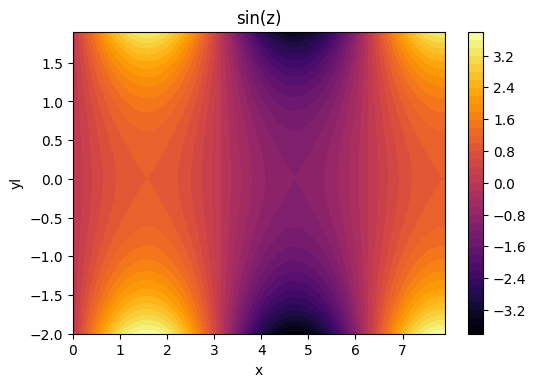

In [6]:
fig = ex2.plot_variables3d('zval', 
                     plot_kwargs=dict(levels=40, cmap='inferno'),
                     yl=np.arange(-20, 20)/10, x=np.arange(0,80)/10,
                    )
plt.title('sin(z)')

## Multi plot
### With 3-d plots

In [7]:
ex3 = Explorer()

@ex3.add_function(provides='compl', requires=('x', 'yl'))
def comp_val(x, yl):
    return x + 1j*yl

@ex3.add_function(provides='sinz', requires='compl')
def sinz(compl):
    return np.sin(compl)

@ex3.add_function(provides='Joukowsky', requires='compl')
def J(compl):
    compl *= 2
    return compl + 1/compl

<ipython-input-7-617fa7ba723e>:14: RuntimeWarning: divide by zero encountered in cdouble_scalars
  return compl + 1/compl
<ipython-input-7-617fa7ba723e>:14: RuntimeWarning: invalid value encountered in cdouble_scalars
  return compl + 1/compl


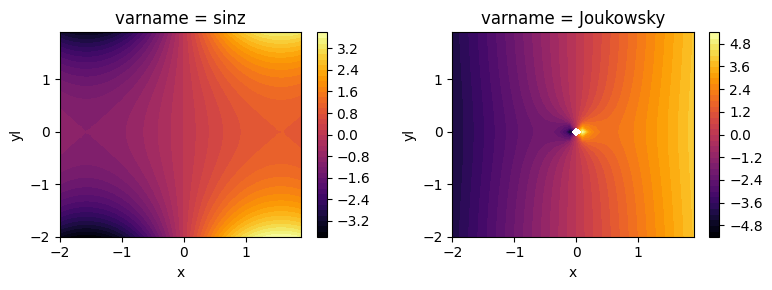

In [8]:
fig = ex3.plot_variables3d(('sinz', 'Joukowsky'),
                     plot_kwargs=dict(levels=40, cmap='inferno'),
                     yl=np.arange(-20, 20)/10, x=np.arange(-20, 20)/10,
                    )
plt.tight_layout()

### With 2-d plots

In [9]:
ex4 = Explorer()

@ex4.add_function(provides='Mass', requires=('time_sec', 'T'))
def mass(time_sec, T):
    return np.exp(-T*time_sec)

@ex4.add_function(provides='T', requires='isotope')
def half_lifes(isotope):
    if isotope == 'Pb186':
        return np.log(2)/4.82
    if isotope == 'Pb187':
        return np.log(2)/15.2

@ex4.add_function(provides='Speed', requires=('time_sec', 'T'))
def speed(time_sec, T):
    return -T*np.exp(-T*time_sec)


[<AxesSubplot:title={'center':'varname = Mass'}, xlabel='time_sec', ylabel='Mass'>,
 <AxesSubplot:title={'center':'varname = Speed'}, xlabel='time_sec', ylabel='Speed'>]

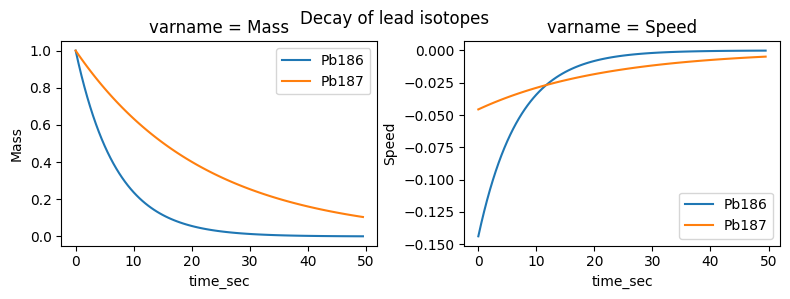

In [10]:
fig = ex4.plot_variables2d(('Mass', 'Speed'),
                     isotope=['Pb186', 'Pb187'], time_sec=np.arange(100)/2
                    )
fig.suptitle('Decay of lead isotopes')
fig.axes